---
# <center>
# <center> **PSI5790 - Aprendizado Profundo para Visão Computacional**
## <center> **Aula 05 - Exercícios**
---

## <center> **Jones Egydio**

---

# **Setup Python**


In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

A linha `from PIL import Image` é uma instrução de importação em Python que carrega a classe `Image` do módulo PIL, que é um acrônimo para Python Imaging Library, mais recentemente conhecida como Pillow. Pillow é uma biblioteca de manipulação de imagens que adiciona suporte para abrir, manipular e salvar muitos formatos de arquivos de imagem diferentes.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Ex01**



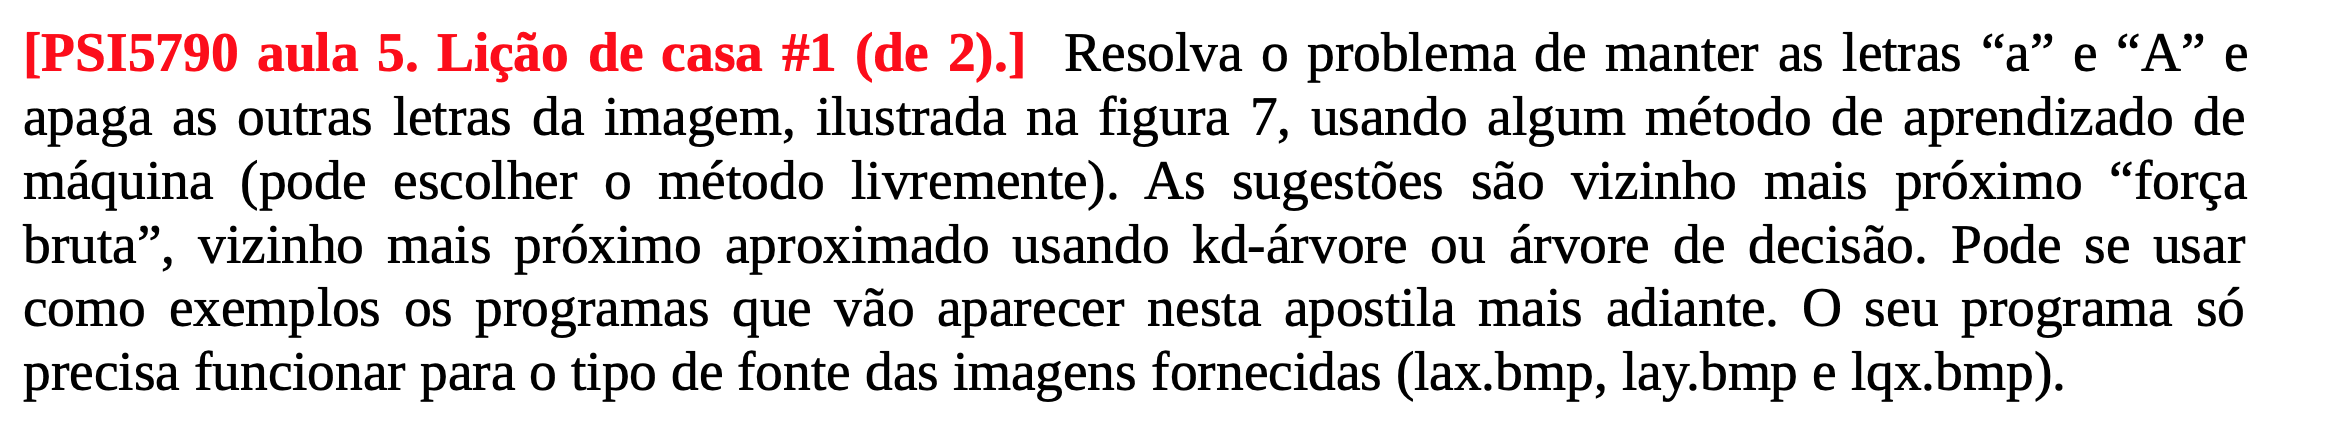

### **Teste 01**

In [3]:
# Função para calcular características simples de um contorno
def calculate_features(contour):
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w)/h
    area = cv2.contourArea(contour)
    return np.array([aspect_ratio, area])

# Carregar a imagem com as letras 'a' e 'A'
image_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 05 ]/aprendizagem/lay.bmp'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Aplicar limiarização para facilitar a detecção de contornos
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Encontrar contornos
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Suposição: a imagem contém apenas um 'a' e um 'A', e 'A' é maior que 'a'
# Portanto, podemos classificar com base na área do contorno
features = np.array([calculate_features(cnt) for cnt in contours])

# Vamos considerar o contorno com a maior área como 'A' e o outro como 'a'
A_index = np.argmax(features[:, 1])  # O 'A' terá a maior área
a_index = 1 - A_index  # Supondo que temos apenas dois contornos

# Extração das características de 'a' e 'A'
features_a = features[a_index]
features_A = features[A_index]

features_a, features_A, contours[a_index].shape, contours[A_index].shape

(array([ 0.85714286, 25.        ]),
 array([ 0.8, 27. ]),
 (10, 1, 2),
 (22, 1, 2))

As características extraídas para as letras 'a' e 'A' da imagem fornecida são as seguintes:

- Para 'a':
  - Razão de aspecto (largura/altura): aproximadamente 0.857
  - Área: 25 unidades de pixel

- Para 'A':
  - Razão de aspecto (largura/altura): aproximadamente 0.8
  - Área: 27 unidades de pixel

Assumindo que essas são as únicas duas letras na imagem e que a letra 'A' tem uma área ligeiramente maior que a letra 'a', essas características podem ser usadas para classificar os caracteres na imagem original.


In [4]:
# Carregar a imagem a ser processada
image_to_process_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 05 ]/aprendizagem/lax.bmp'
image_to_process = cv2.imread(image_to_process_path, cv2.IMREAD_GRAYSCALE)

# Aplicar limiarização para facilitar a detecção de contornos
_, thresh = cv2.threshold(image_to_process, 127, 255, cv2.THRESH_BINARY_INV)

# Encontrar contornos
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Características dos 'a' e 'A'
features_a = np.array([0.857, 25])  # Obtido previamente acima
features_A = np.array([0.8, 27])    # Obtido previamente acima

## Definir um limiar euclidiano baseado na distância média entre as características conhecidas
limiar_distancia = 0.5  # Este valor é uma estimativa inicial e pode precisar ser ajustado

# Processar cada contorno
for contour in contours:
    features = calculate_features(contour)

    # Distância até as características de 'a' e 'A'
    distance_to_a = np.linalg.norm(features - features_a)
    distance_to_A = np.linalg.norm(features - features_A)

    # Se o contorno não é nem 'a' nem 'A', removê-lo
    if distance_to_a > limiar_distancia and distance_to_A > limiar_distancia:
        # Assumir que o fundo é branco (255)
        cv2.drawContours(image_to_process, [contour], -1, (255), thickness=cv2.FILLED)

# Salvar a imagem final
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 05 ]/aprendizagem/imagem_processada.png', image_to_process)

True

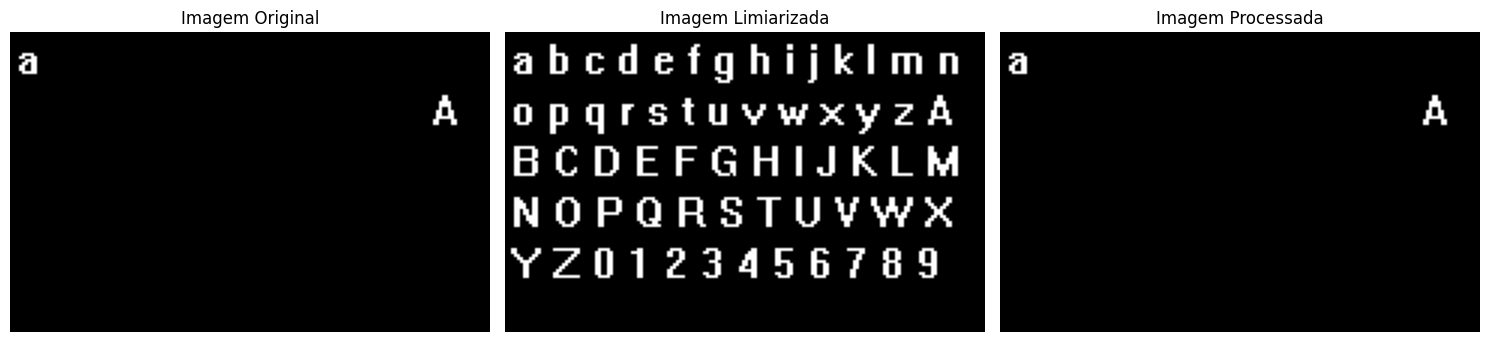

In [5]:
#Visualizando as imagens lado a lado
image_visualization = cv2.bitwise_not(image)

# A imagem processada final será a imagem original com os contornos removidos
# Então, também invertemos as cores para visualização
image_to_process_visualization = cv2.bitwise_not(image_to_process)

# Configurando o plot para as três imagens
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Mostrando a imagem original
axs[0].imshow(image_visualization, cmap='gray')
axs[0].set_title('Imagem Original')
axs[0].axis('off')

# Mostrando a imagem limiarizada
axs[1].imshow(thresh, cmap='gray')
axs[1].set_title('Imagem Limiarizada')
axs[1].axis('off')

# Mostrando a imagem processada
axs[2].imshow(image_to_process_visualization, cmap='gray')
axs[2].set_title('Imagem Processada')
axs[2].axis('off')

# Ajustar espaçamento
plt.tight_layout()
plt.show()

### **Teste 02**

In [6]:
# Carregar a imagem a ser processada
image_to_process_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 05 ]/aprendizagem/lqx.bmp'
image_to_process = cv2.imread(image_to_process_path, cv2.IMREAD_GRAYSCALE)

# Aplicar limiarização para facilitar a detecção de contornos
_, thresh = cv2.threshold(image_to_process, 127, 255, cv2.THRESH_BINARY_INV)

# Encontrar contornos
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Características dos 'a' e 'A'
features_a = np.array([0.857, 25])  # Obtido previamente acima
features_A = np.array([0.8, 27])    # Obtido previamente acima

## Definir um limiar euclidiano baseado na distância média entre as características conhecidas
limiar_distancia = 1.0  # Este valor é uma estimativa inicial e pode precisar ser ajustado

# Processar cada contorno
for contour in contours:
    features = calculate_features(contour)

    # Distância até as características de 'a' e 'A'
    distance_to_a = np.linalg.norm(features - features_a)
    distance_to_A = np.linalg.norm(features - features_A)

    # Se o contorno não é nem 'a' nem 'A', removê-lo
    if distance_to_a > limiar_distancia and distance_to_A > limiar_distancia:
        # Assumir que o fundo é branco (255)
        cv2.drawContours(image_to_process, [contour], -1, (255), thickness=cv2.FILLED)

# Salvar a imagem final
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 05 ]/aprendizagem/imagem_processada2.png', image_to_process)

True

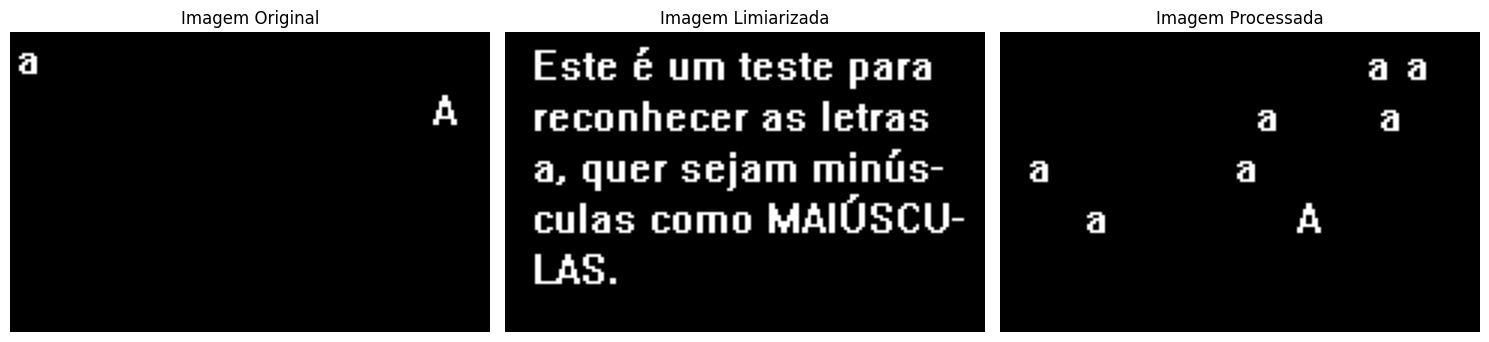

In [7]:
#Visualizando as imagens lado a lado
image_visualization = cv2.bitwise_not(image)

# A imagem processada final será a imagem original com os contornos removidos
# Então, também invertemos as cores para visualização
image_to_process_visualization = cv2.bitwise_not(image_to_process)

# Configurando o plot para as três imagens
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Mostrando a imagem original
axs[0].imshow(image_visualization, cmap='gray')
axs[0].set_title('Imagem Original')
axs[0].axis('off')

# Mostrando a imagem limiarizada
axs[1].imshow(thresh, cmap='gray')
axs[1].set_title('Imagem Limiarizada')
axs[1].axis('off')

# Mostrando a imagem processada
axs[2].imshow(image_to_process_visualization, cmap='gray')
axs[2].set_title('Imagem Processada')
axs[2].axis('off')

# Ajustar espaçamento
plt.tight_layout()
plt.show()

---

## **Ex02**

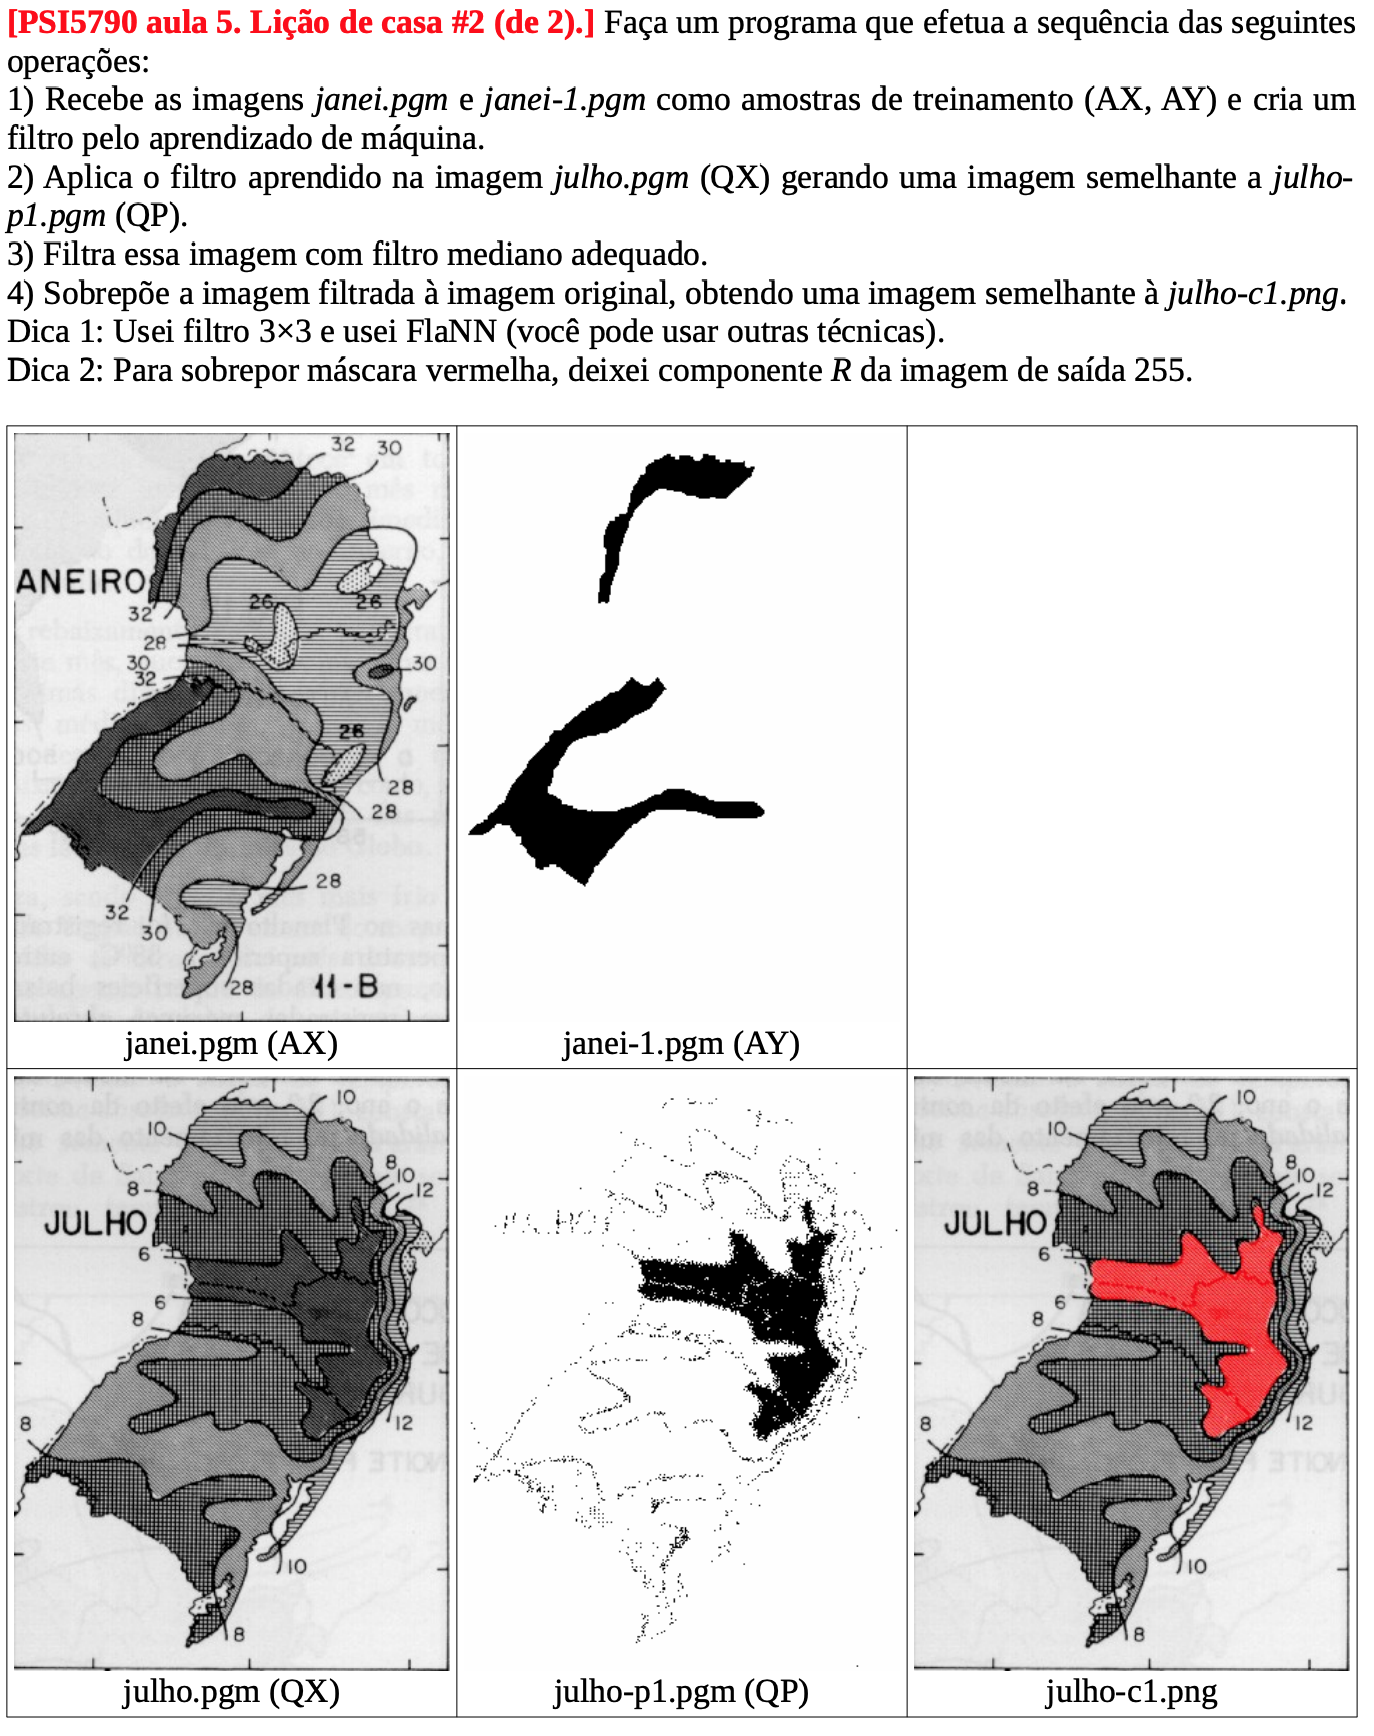

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, InputLayer
from skimage import io

# Carregar suas imagens aqui
janei = io.imread('/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 05 ]/aprendizagem/janei.pgm')
janei_1 = io.imread('/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 05 ]/aprendizagem/janei-1.pgm')
julho = io.imread('/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 05 ]/aprendizagem/julho.pgm')

# Definindo a CNN
model = Sequential([
    InputLayer(input_shape=(None, None, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(1, (3, 3), activation='linear', padding='same')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Preparando imagens para treinamento (adicionando uma dimensão de canal)
X_train = janei.reshape((1, janei.shape[0], janei.shape[1], 1))
y_train = janei_1.reshape((1, janei_1.shape[0], janei_1.shape[1], 1))

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, verbose=1)

# Aplicando o modelo na imagem 'julho'
julho_input = julho.reshape((1, julho.shape[0], julho.shape[1], 1))
julho_output = model.predict(julho_input)
julho_output = julho_output.reshape(julho.shape)

# Normalizando a saída para o intervalo de 0 a 255
julho_output = np.clip(julho_output, 0, 255).astype(np.uint8)

# Salvar ou exibir a imagem resultante
io.imsave('/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 05 ]/aprendizagem/julho_filtered.pgm', julho_output)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 55116.5000
Epoch 2/100
1/1 [==============================] - 0s 465ms/step - loss: 50343.0977
Epoch 3/100
1/1 [==============================] - 0s 489ms/step - loss: 45756.7500
Epoch 4/100
1/1 [==============================] - 0s 499ms/step - loss: 41321.7539
Epoch 5/100
1/1 [==============================] - 0s 458ms/step - loss: 37091.4883
Epoch 6/100
1/1 [==============================] - 0s 431ms/step - loss: 33086.5469
Epoch 7/100
1/1 [==============================] - 1s 535ms/step - loss: 29327.8730
Epoch 8/100
1/1 [==============================] - 0s 444ms/step - loss: 25896.6016
Epoch 9/100
1/1 [==============================] - 0s 440ms/step - loss: 22711.5996
Epoch 10/100
1/1 [==============================] - 0s 424ms/step - loss: 19770.0645
Epoch 11/100
1/1 [==============================] - 0s 297ms/step - loss: 17062.0234
Epoch 12/100
1/1 [==============================] - 0s 311ms/step - loss: 145

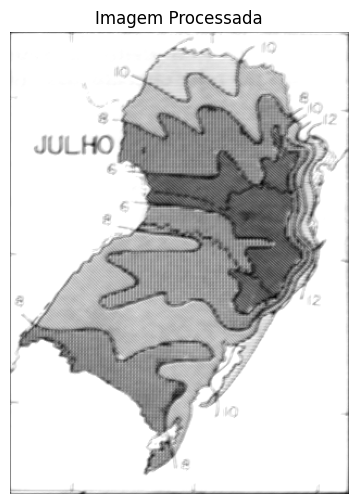

In [24]:
# Assumindo que 'julho_output' é a imagem processada
plt.figure(figsize=(6, 6))
plt.imshow(julho_output, cmap='gray')  # Exibir em escala de cinza
plt.title('Imagem Processada')
plt.axis('off')  # Ocultar os eixos
plt.show()

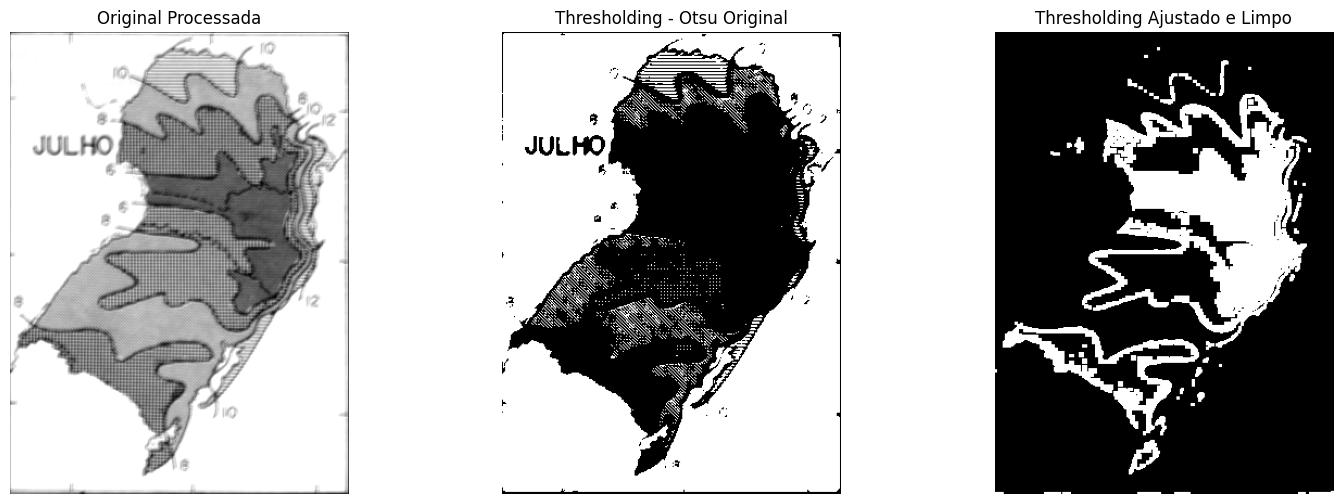

In [30]:
from skimage.morphology import opening, square

# Ajustando o threshold de Otsu para ser mais seletivo com áreas escuras
thresh_adjusted = thresh * 0.85  # Reduzir o threshold para capturar mais áreas escuras
julho_thresholded_adjusted = julho_filtered < thresh_adjusted

# Aplicando operação morfológica para limpar ruídos
julho_cleaned = opening(julho_thresholded_adjusted, square(3))

# Exibindo os resultados
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(julho_filtered, cmap='gray')
ax[0].set_title('Original Processada')
ax[0].axis('off')

ax[1].imshow(julho_thresholded, cmap='gray')
ax[1].set_title('Thresholding - Otsu Original')
ax[1].axis('off')

ax[2].imshow(julho_cleaned, cmap='gray')
ax[2].set_title('Thresholding Ajustado e Limpo')
ax[2].axis('off')

plt.show()


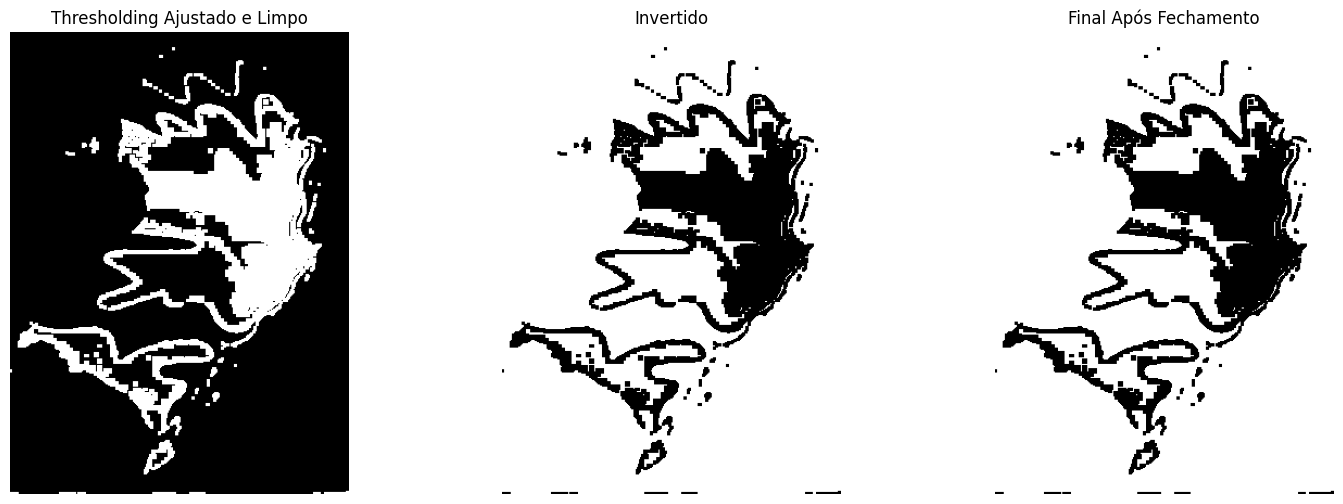

In [31]:
from skimage.morphology import closing

# Invertendo a máscara do thresholding ajustado
julho_inverted = ~julho_cleaned

# Aplicando operação morfológica de fechamento para suavizar os contornos e remover artefatos
julho_final = closing(julho_inverted, square(3))

# Exibindo os resultados
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(julho_cleaned, cmap='gray')
ax[0].set_title('Thresholding Ajustado e Limpo')
ax[0].axis('off')

ax[1].imshow(julho_inverted, cmap='gray')
ax[1].set_title('Invertido')
ax[1].axis('off')

ax[2].imshow(julho_final, cmap='gray')
ax[2].set_title('Final Após Fechamento')
ax[2].axis('off')

plt.show()

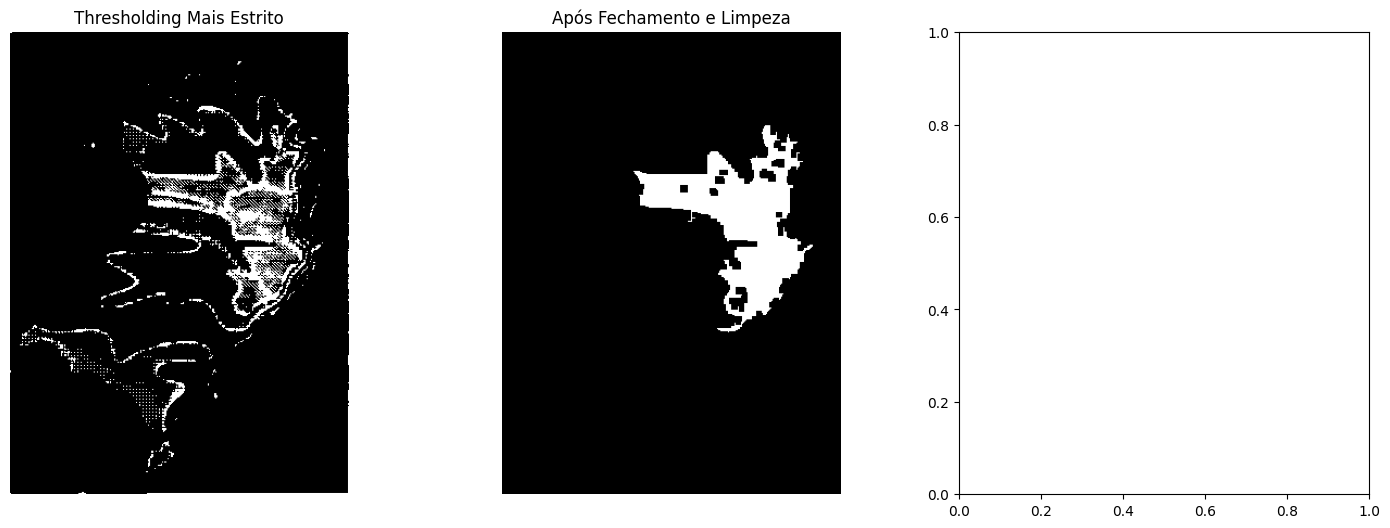

In [48]:
from skimage.morphology import remove_small_objects

# Aplicando thresholding mais agressivo
thresh_strict = filters.threshold_otsu(julho_filtered) * 0.5
julho_strict_thresholded = julho_filtered < thresh_strict

# Operações morfológicas para preencher e limpar
julho_morph_cleaned = closing(julho_strict_thresholded, square(5))
julho_morph_cleaned = remove_small_objects(julho_morph_cleaned, min_size=3000)

# Exibindo os resultados
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(julho_strict_thresholded, cmap='gray')
ax[0].set_title('Thresholding Mais Estrito')
ax[0].axis('off')

ax[1].imshow(julho_morph_cleaned, cmap='gray')
ax[1].set_title('Após Fechamento e Limpeza')
ax[1].axis('off')

plt.show()
